In [200]:
# Load the libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import datetime as dt

In [201]:
# Read in the data file
location = pd.read_csv('Sales by store location.csv',na_values=[])

In [202]:
location.head()

,store_id,store_state,store_postcode,store_latitude,store_longitude,co_location_flag,sales_channel,distance_to_kmart,distance_to_target,total_sale_value,total_sale_value_ex_gst,total_promotional_sales_value
0,f639b3bffb0910cb1de42fee016df58d,NSW,2171,-33.9271,150.8578,NaN,Digital - Delivery,NaN,NaN,19893406.80,18089405.66,233280.34
1,dad2fd502d209b12ac27f451b0b9c17e,NSW,2325,-32.8357,151.3535,False,Store,>5 KM,<1 KM,45805299.60,41876270.68,5820887.92
2,dad2fd502d209b12ac27f451b0b9c17e,NSW,2325,-32.8357,151.3535,False,Digital - ClickCollect,>5 KM,<1 KM,3950499.23,3593377.70,36306.13
3,b03a75fccca587a511170aa5b7952210,NSW,2430,-31.9101,152.4583,True,Store,>5 KM,<1 KM,53824089.33,49136867.08,7816228.29
4,b03a75fccca587a511170aa5b7952210,NSW,2430,-31.9101,152.4583,True,Digital - ClickCollect,>5 KM,<1 KM,3910046.42,3556971.06,36379.29


In [203]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   store_id                       425 non-null    object 
 1   store_state                    425 non-null    object 
 2   store_postcode                 425 non-null    int64  
 3   store_latitude                 425 non-null    float64
 4   store_longitude                425 non-null    float64
 5   co_location_flag               414 non-null    object 
 6   sales_channel                  425 non-null    object 
 7   distance_to_kmart              424 non-null    object 
 8   distance_to_target             424 non-null    object 
 9   total_sale_value               425 non-null    float64
 10  total_sale_value_ex_gst        425 non-null    float64
 11  total_promotional_sales_value  425 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 4

In [204]:
missing_values = location.isna().sum() #Count the number of missing value of each column

missing_perc = missing_values/location.shape[0]*100
na = pd.DataFrame([missing_values, missing_perc], index = ['missing_num', 'missing_perc']).T
na = na.sort_values(by = 'missing_perc', ascending = False)
na

,missing_num,missing_perc
co_location_flag,11.0,2.588235
distance_to_kmart,1.0,0.235294
distance_to_target,1.0,0.235294
store_id,0.0,0.000000
store_state,0.0,0.000000
store_postcode,0.0,0.000000
store_latitude,0.0,0.000000
store_longitude,0.0,0.000000
sales_channel,0.0,0.000000
total_sale_value,0.0,0.000000


In [205]:
location.describe()
location.dropna()

,store_id,store_state,store_postcode,store_latitude,store_longitude,co_location_flag,sales_channel,distance_to_kmart,distance_to_target,total_sale_value,total_sale_value_ex_gst,total_promotional_sales_value
1,dad2fd502d209b12ac27f451b0b9c17e,NSW,2325,-32.8357,151.3535,False,Store,>5 KM,<1 KM,45805299.60,41876270.68,5820887.92
2,dad2fd502d209b12ac27f451b0b9c17e,NSW,2325,-32.8357,151.3535,False,Digital - ClickCollect,>5 KM,<1 KM,3950499.23,3593377.70,36306.13
3,b03a75fccca587a511170aa5b7952210,NSW,2430,-31.9101,152.4583,True,Store,>5 KM,<1 KM,53824089.33,49136867.08,7816228.29
4,b03a75fccca587a511170aa5b7952210,NSW,2430,-31.9101,152.4583,True,Digital - ClickCollect,>5 KM,<1 KM,3910046.42,3556971.06,36379.29
5,a9bd0eeb3ce6858df275497bb2089ec4,NSW,2478,-28.8591,153.5644,False,Store,<1 KM,<1 KM,45348355.65,41363756.45,6134004.10
...,...,...,...,...,...,...,...,...,...,...,...,...
420,42d470aa848c771c6522022a5e974f97,WA,6027,-31.7438,115.7665,True,Store,Same Centre,Same Centre,63887129.46,58302662.97,8946705.85
421,06dc9c10cb8eb46b5fcca86460df8662,WA,6056,-31.8903,116.0015,True,Digital - ClickCollect,Same Centre,Same Centre,3475983.65,3161995.57,27192.66
422,06dc9c10cb8eb46b5fcca86460df8662,WA,6056,-31.8903,116.0015,True,Store,Same Centre,Same Centre,69622766.17,63498115.67,9680061.90
423,9732aa7d24a1bc42b7bd1c2a4ca45732,WA,6210,-32.5351,115.7418,True,Digital - ClickCollect,Same Centre,Same Centre,2433211.16,2213407.30,17508.98


In [206]:
Customer_train = pd.read_csv('Sales by customer location train.csv',na_values=[])
Customer_test = pd.read_csv('Sales by customer location test.csv',na_values=[])
Media = pd.read_csv('Media Investment.csv',na_values=[])

In [207]:
Customer_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827592 entries, 0 to 1827591
Data columns (total 11 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   store_id                       object 
 1   sales_channel                  object 
 2   customer_state                 object 
 3   customer_postcode              float64
 4   price_lifestage_segment        object 
 5   customer_count                 int64  
 6   transaction_count              int64  
 7   total_sale_value               float64
 8   total_sale_value_ex_gst        float64
 9   total_promotional_sales_value  float64
 10  financial_week_end_date        object 
dtypes: float64(4), int64(2), object(5)
memory usage: 153.4+ MB


In [208]:
Customer_train.head()

,store_id,sales_channel,customer_state,customer_postcode,price_lifestage_segment,customer_count,transaction_count,total_sale_value,total_sale_value_ex_gst,total_promotional_sales_value,financial_week_end_date
0,536fcc1021bff60edb212ca9b2480757,Store,NSW,2550.0,Budget-New Families,51,77,6691.29,6146.98,1545.78,2023-03-26
1,151e50feaf21b61cf23e0b944abebe28,Store,VIC,3222.0,Budget-Retirees,8,8,364.53,331.40,89.72,2022-01-02
2,b94d71e6bc4cc21ffbaaef5e4aca6f03,Store,QLD,4101.0,Mainstream-Young Singles/Couples,10,11,446.25,405.69,9.75,2023-03-19
3,336e7e53cf0e3fbc9eb41bfaf6dc4847,Store,SA,5253.0,Mainstream-Young Families,79,119,7479.89,6817.90,1365.50,2023-01-29
4,97012ce84c33e28732cb5f12bb92363c,Store,VIC,3064.0,Premium-New Families,58,84,6172.44,5630.27,508.59,2021-11-07


In [209]:
missing_values = Customer_train.isna().sum() #Count the number of missing value of each column

missing_perc = missing_values/Customer_train.shape[0]*100
na = pd.DataFrame([missing_values, missing_perc], index = ['missing_num', 'missing_perc']).T
na = na.sort_values(by = 'missing_perc', ascending = False)
na

,missing_num,missing_perc
price_lifestage_segment,13565.0,0.742233
customer_postcode,7.0,0.000383
store_id,0.0,0.000000
sales_channel,0.0,0.000000
customer_state,0.0,0.000000
customer_count,0.0,0.000000
transaction_count,0.0,0.000000
total_sale_value,0.0,0.000000
total_sale_value_ex_gst,0.0,0.000000
total_promotional_sales_value,0.0,0.000000


In [210]:
Customer_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365518 entries, 0 to 365517
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   store_id                       365518 non-null  object 
 1   sales_channel                  365518 non-null  object 
 2   customer_state                 365518 non-null  object 
 3   customer_postcode              365517 non-null  float64
 4   price_lifestage_segment        362873 non-null  object 
 5   customer_count                 365518 non-null  int64  
 6   transaction_count              365518 non-null  int64  
 7   total_sale_value               365518 non-null  float64
 8   total_sale_value_ex_gst        365518 non-null  float64
 9   total_promotional_sales_value  365518 non-null  float64
 10  financial_week_end_date        365518 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 30.7+ MB


In [211]:
Customer_test.head()

,store_id,sales_channel,customer_state,customer_postcode,price_lifestage_segment,customer_count,transaction_count,total_sale_value,total_sale_value_ex_gst,total_promotional_sales_value,financial_week_end_date
0,fbfaede8d00839631393db8bdecbb3db,Store,SA,5045.0,Mainstream-Retirees,15,16,599.62,551.47,143.79,2022-07-31
1,44d448cd118a0fa8e7aca858695e7eee,Store,SA,5034.0,Mainstream-Older Singles/Couples,33,41,1733.01,1578.76,125.60,2022-04-03
2,35cd5684b999df06e1e0f09bcd14e993,Store,SA,5167.0,Mainstream-Older Families,10,11,894.80,814.57,235.47,2023-01-08
3,66f2eafa8a6f6d17e186c85f84e369a3,Store,VIC,3032.0,Mainstream-Older Singles/Couples,45,57,2687.72,2443.37,196.12,2021-11-07
4,7dd5071ff43138f6756e30f4b271c4ac,Store,QLD,4017.0,Premium-Young Families,11,11,530.78,484.08,47.30,2022-10-30


In [212]:
Media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   week_ending         948 non-null    object 
 1   state               948 non-null    object 
 2   media_amount_spend  948 non-null    float64
dtypes: float64(1), object(2)
memory usage: 22.3+ KB


In [213]:
Media.head()

,week_ending,state,media_amount_spend
0,11/07/2021,NT,5960.266526
1,9/10/2022,NT,11727.146180
2,22/01/2023,NT,13918.705420
3,2/01/2022,NT,13076.182500
4,5/06/2022,NT,20148.750420


In [214]:
Media = Media.rename(columns={"week_ending": "financial_week_end_date"})
Media = Media.rename(columns={"state": "customer_state"})
# Convert the 'financial_week_end_date' column to datetime
Media['financial_week_end_date'] = pd.to_datetime(Media['financial_week_end_date'], format='%d/%m/%Y')
Media['financial_week_end_date'] = Media['financial_week_end_date'].dt.strftime('%Y-%m-%d')
Media.head()

,financial_week_end_date,customer_state,media_amount_spend
0,2021-07-11,NT,5960.266526
1,2022-10-09,NT,11727.146180
2,2023-01-22,NT,13918.705420
3,2022-01-02,NT,13076.182500
4,2022-06-05,NT,20148.750420


#EDA Analysis

OVERVIEW

1. CUSTOMER LOCATION

In [215]:
import seaborn as sns

In [216]:
#Firstly, we look at the number of total sales by State as well as the media ammount spend per state
# Calculating total sales value by state & store channel
data_bar = Customer_train.groupby(['customer_state','sales_channel'],as_index=False)['total_sale_value'].sum() #.sort_values(ascending=True)
data_bar

,customer_state,sales_channel,total_sale_value
0,ACT,Digital - ClickCollect,2.308083e+05
1,ACT,Digital - Delivery,2.107166e+04
2,ACT,Store,6.055247e+07
3,NSW,Digital - ClickCollect,2.197498e+07
4,NSW,Digital - Delivery,7.587856e+05
5,NSW,Store,1.027452e+09
6,NT,Digital - ClickCollect,7.394800e+04
7,NT,Store,3.602010e+07
8,Other,Store,1.886210e+03
9,QLD,Digital - ClickCollect,1.075628e+07


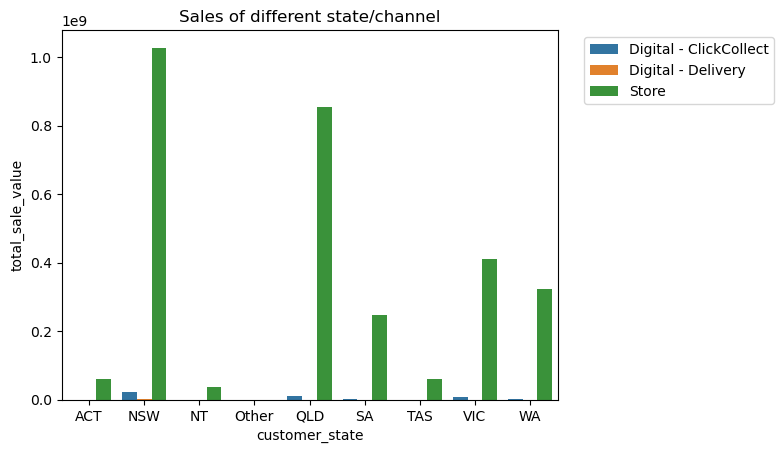

In [217]:
sns.barplot(y = "total_sale_value", x = "customer_state",hue="sales_channel",data = data_bar)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('Sales of different state/channel')
plt.show()

In [218]:
data_bar2 = Media.groupby(['customer_state'],as_index=False)['media_amount_spend'].sum() #.sort_values(ascending=True)
data_bar2 = data_bar2.sort_values('media_amount_spend').reset_index()

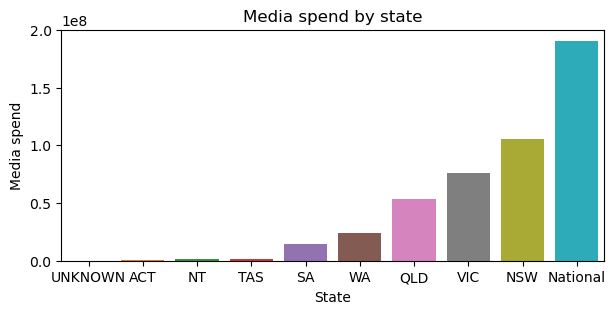

In [219]:
plt.figure(figsize=(7, 3))

sns.barplot(x='customer_state', y='media_amount_spend', data=data_bar2)
plt.xlabel('State')
plt.ylabel('Media spend')
plt.title('Media spend by state')

plt.show()

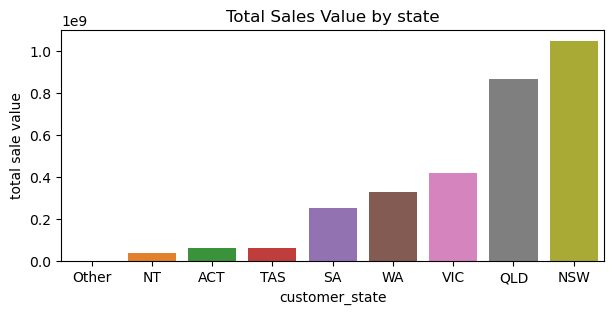

In [220]:
data_bar3 = Customer_train.groupby(['customer_state'],as_index=False)['total_sale_value'].sum() #.sort_values(ascending=True)
data_bar3 = data_bar3.sort_values('total_sale_value').reset_index()
plt.figure(figsize=(7, 3))

sns.barplot(x='customer_state', y='total_sale_value', data=data_bar3)
plt.xlabel('customer_state')
plt.ylabel('total sale value')
plt.title('Total Sales Value by state')

plt.show()

AFFECT OF COMPETITORS

In [221]:
location = location.dropna()
location.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 424
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   store_id                       414 non-null    object 
 1   store_state                    414 non-null    object 
 2   store_postcode                 414 non-null    int64  
 3   store_latitude                 414 non-null    float64
 4   store_longitude                414 non-null    float64
 5   co_location_flag               414 non-null    object 
 6   sales_channel                  414 non-null    object 
 7   distance_to_kmart              414 non-null    object 
 8   distance_to_target             414 non-null    object 
 9   total_sale_value               414 non-null    float64
 10  total_sale_value_ex_gst        414 non-null    float64
 11  total_promotional_sales_value  414 non-null    float64
dtypes: float64(5), int64(1), object(6)
memory usage: 4

In [222]:
dummies = pd.get_dummies(location, columns=["co_location_flag","distance_to_kmart","distance_to_target"], drop_first = True)
dummies

,store_id,store_state,store_postcode,store_latitude,store_longitude,sales_channel,total_sale_value,total_sale_value_ex_gst,total_promotional_sales_value,co_location_flag_True,distance_to_kmart_3-5 KM,distance_to_kmart_<1 KM,distance_to_kmart_>5 KM,distance_to_kmart_Same Centre,distance_to_target_3-5 KM,distance_to_target_<1 KM,distance_to_target_>5 KM,distance_to_target_Same Centre
1,dad2fd502d209b12ac27f451b0b9c17e,NSW,2325,-32.8357,151.3535,Store,45805299.60,41876270.68,5820887.92,0,0,0,1,0,0,1,0,0
2,dad2fd502d209b12ac27f451b0b9c17e,NSW,2325,-32.8357,151.3535,Digital - ClickCollect,3950499.23,3593377.70,36306.13,0,0,0,1,0,0,1,0,0
3,b03a75fccca587a511170aa5b7952210,NSW,2430,-31.9101,152.4583,Store,53824089.33,49136867.08,7816228.29,1,0,0,1,0,0,1,0,0
4,b03a75fccca587a511170aa5b7952210,NSW,2430,-31.9101,152.4583,Digital - ClickCollect,3910046.42,3556971.06,36379.29,1,0,0,1,0,0,1,0,0
5,a9bd0eeb3ce6858df275497bb2089ec4,NSW,2478,-28.8591,153.5644,Store,45348355.65,41363756.45,6134004.10,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,42d470aa848c771c6522022a5e974f97,WA,6027,-31.7438,115.7665,Store,63887129.46,58302662.97,8946705.85,1,0,0,0,1,0,0,0,1
421,06dc9c10cb8eb46b5fcca86460df8662,WA,6056,-31.8903,116.0015,Digital - ClickCollect,3475983.65,3161995.57,27192.66,1,0,0,0,1,0,0,0,1
422,06dc9c10cb8eb46b5fcca86460df8662,WA,6056,-31.8903,116.0015,Store,69622766.17,63498115.67,9680061.90,1,0,0,0,1,0,0,0,1
423,9732aa7d24a1bc42b7bd1c2a4ca45732,WA,6210,-32.5351,115.7418,Digital - ClickCollect,2433211.16,2213407.30,17508.98,1,0,0,0,1,0,0,0,1


In [223]:
dummies['log_total_sale_value'] = np.log(dummies['total_sale_value'])
regression_data = dummies[['log_total_sale_value', 'co_location_flag_True',
        'distance_to_kmart_3-5 KM', 'distance_to_kmart_<1 KM',
       'distance_to_kmart_>5 KM', 'distance_to_kmart_Same Centre', 'distance_to_target_3-5 KM',
       'distance_to_target_<1 KM', 'distance_to_target_>5 KM', 'distance_to_target_Same Centre']]
regression_data

,log_total_sale_value,co_location_flag_True,distance_to_kmart_3-5 KM,distance_to_kmart_<1 KM,distance_to_kmart_>5 KM,distance_to_kmart_Same Centre,distance_to_target_3-5 KM,distance_to_target_<1 KM,distance_to_target_>5 KM,distance_to_target_Same Centre
1,17.639910,0,0,0,1,0,0,1,0,0
2,15.189353,0,0,0,1,0,0,1,0,0
3,17.801232,1,0,0,1,0,0,1,0,0
4,15.179060,1,0,0,1,0,0,1,0,0
5,17.629884,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
420,17.972628,1,0,0,0,1,0,0,0,1
421,15.061388,1,0,0,0,1,0,0,0,1
422,18.058602,1,0,0,0,1,0,0,0,1
423,14.704722,1,0,0,0,1,0,0,0,1


Text(0.5, 1.0, 'Correlation between Competitor proximity and total sales value')

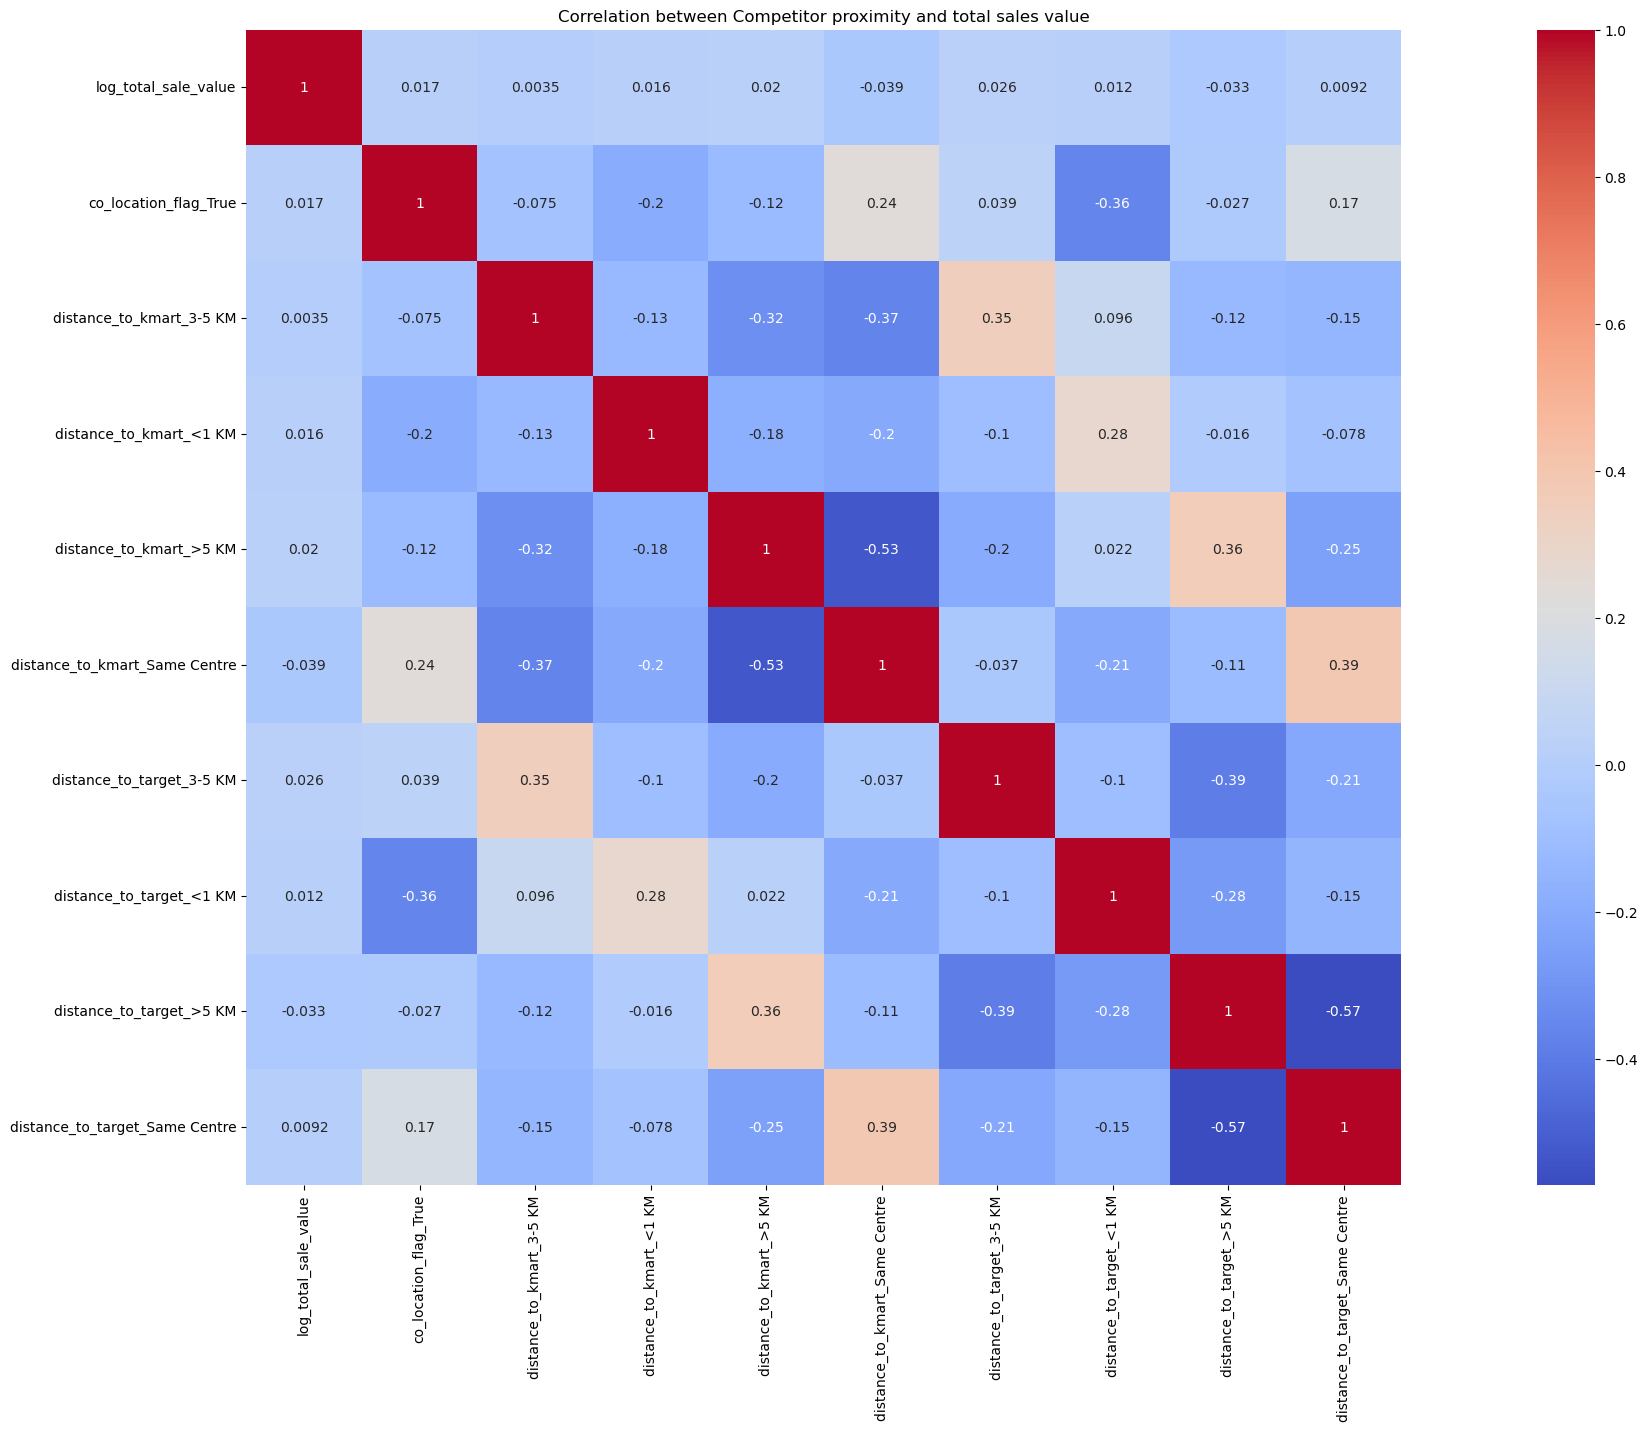

In [224]:
plt.subplots(figsize = (35,15))
sns.heatmap(regression_data.corr(), square = True, annot = True, cmap = "coolwarm")
plt.title('Correlation between Competitor proximity and total sales value')

In [225]:
y = regression_data['log_total_sale_value']

# select all variables except total_sale_value
X = regression_data.loc[:, regression_data.columns != 'total_sale_value']
y[y==0]
# change y to a very small number if it's 0
y[y==0]=0.0001
y[y==0.0001]
y = np.log(y) #transform total_sale_value variable to log

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                             OLS Regression Results                             
Dep. Variable:     log_total_sale_value   R-squared:                       0.997
Model:                              OLS   Adj. R-squared:                  0.997
Method:                   Least Squares   F-statistic:                 1.319e+04
Date:                  Mon, 16 Oct 2023   Prob (F-statistic):               0.00
Time:                          11:39:52   Log-Likelihood:                 1589.8
No. Observations:                   414   AIC:                            -3158.
Df Residuals:                       403   BIC:                            -3113.
Df Model:                            10                                         
Covariance Type:              nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

C:\Users\Tran Dong Hy\AppData\Local\Temp\ipykernel_3080\161565854.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y==0]=0.0001
C:\Users\Tran Dong Hy\AppData\Local\Temp\ipykernel_3080\161565854.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y==0]=0.0001


SEASONALITY

In [226]:
#First of all, we look at the trend of total_sale_value by seasonality from July 2021 - May 2023
Weekly_sales = Customer_train.groupby(['financial_week_end_date'],as_index=False)['total_sale_value'].sum()
Weekly_sales['financial_week_end_date'] = pd.to_datetime(Weekly_sales['financial_week_end_date'], format='%Y-%m-%d')
Weekly_sales['month'] = Weekly_sales['financial_week_end_date'].dt.strftime('%m/%y')
Weekly_sales
Monthly_sales = Weekly_sales.groupby(['month'],as_index=False)['total_sale_value'].sum()
Monthly_sales['month'] = pd.to_datetime(Monthly_sales['month'], format='%m/%y')
Monthly_sales = Monthly_sales.sort_values(by='month')
Monthly_sales

,month,total_sale_value
11,2021-07-01,9.087404e+07
13,2021-08-01,8.982206e+07
15,2021-09-01,7.159394e+07
17,2021-10-01,1.285080e+08
19,2021-11-01,1.588422e+08
21,2021-12-01,2.298830e+08
0,2022-01-01,1.213799e+08
2,2022-02-01,1.009670e+08
4,2022-03-01,1.090032e+08
6,2022-04-01,1.273202e+08


In [227]:
Media_spending = Media.groupby(['financial_week_end_date'],as_index=False)['media_amount_spend'].sum()
Media_spending['financial_week_end_date'] = pd.to_datetime(Media_spending['financial_week_end_date'], format='%Y-%m-%d')
Media_spending['month'] = Media_spending['financial_week_end_date'].dt.strftime('%m/%y')
Media_spending['month'] = pd.to_datetime(Media_spending['month'], format='%m/%y')
Media_spending = Media_spending.groupby(['month'],as_index=False)['media_amount_spend'].sum()
merged_sales = pd.merge(Monthly_sales, Media_spending, on='month', how='outer')
merged_sales = merged_sales.sort_values(by='month').dropna()
merged_sales

,month,total_sale_value,media_amount_spend
0,2021-07-01,9.087404e+07,1.265633e+07
1,2021-08-01,8.982206e+07,1.754195e+07
2,2021-09-01,7.159394e+07,1.604047e+07
3,2021-10-01,1.285080e+08,2.350555e+07
4,2021-11-01,1.588422e+08,3.613892e+07
5,2021-12-01,2.298830e+08,1.988238e+07
6,2022-01-01,1.213799e+08,1.098440e+07
7,2022-02-01,1.009670e+08,1.592791e+07
8,2022-03-01,1.090032e+08,1.475906e+07
9,2022-04-01,1.273202e+08,1.696585e+07


<Axes: xlabel='month', ylabel='total_sale_value'>

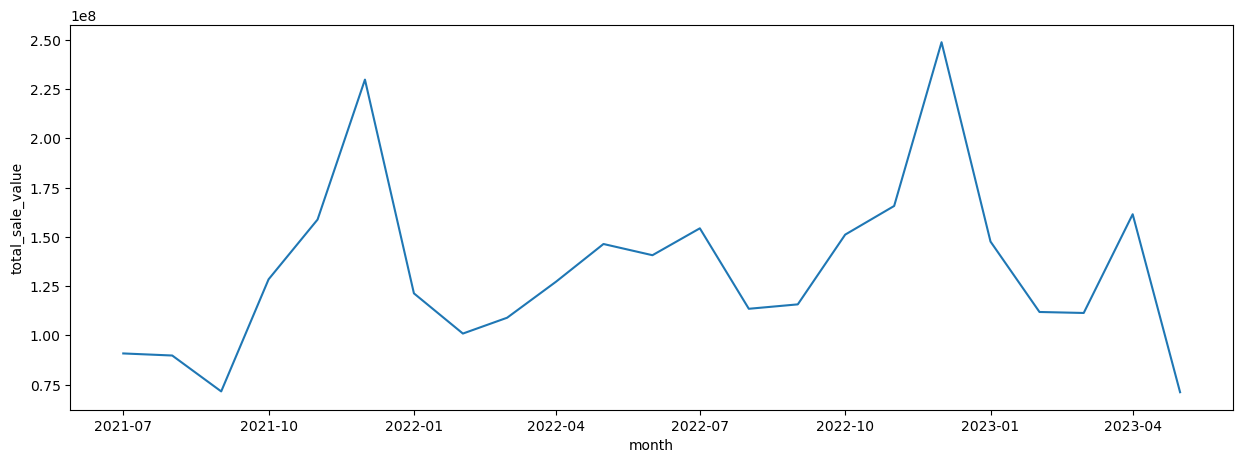

In [228]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=Monthly_sales, x="month", y="total_sale_value")

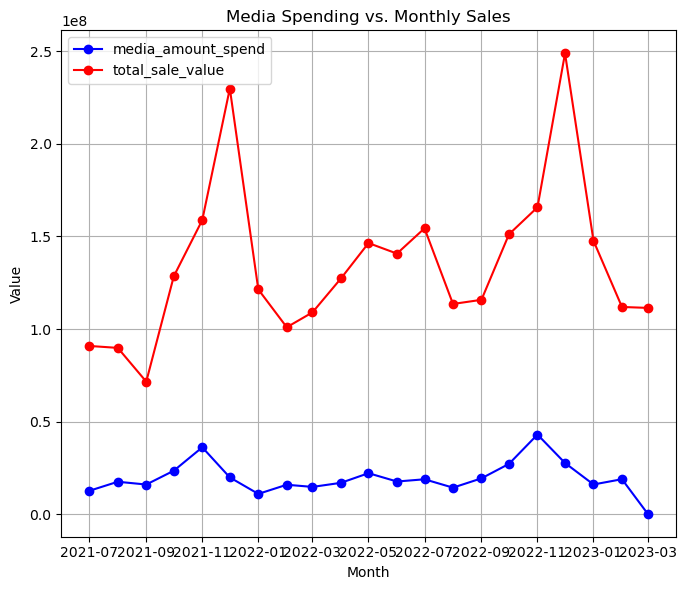

In [229]:
  # Plotting
  plt.figure(figsize=(7, 6))
  plt.plot(merged_sales['month'], merged_sales['media_amount_spend'], label='media_amount_spend', color='blue', marker='o')
  plt.plot(merged_sales['month'], merged_sales['total_sale_value'], label='total_sale_value', color='red', marker='o')

  plt.title('Media Spending vs. Monthly Sales')
  plt.xlabel('Month')
  plt.ylabel('Value')
  plt.legend()
  plt.grid(True)
  plt.tight_layout()
  plt.show()


In [230]:
#In term of time, total_sales_value
Weekly_sales2 = Customer_train.groupby(['financial_week_end_date','customer_state'],as_index=False)['total_sale_value'].sum()
Weekly_sales2

,financial_week_end_date,customer_state,total_sale_value
0,2021-07-04,ACT,515547.36
1,2021-07-04,NSW,7405040.88
2,2021-07-04,NT,123703.37
3,2021-07-04,QLD,6553888.37
4,2021-07-04,SA,2151429.59
...,...,...,...
794,2023-05-21,QLD,2277509.76
795,2023-05-21,SA,578582.94
796,2023-05-21,TAS,170649.32
797,2023-05-21,VIC,944730.93


<Axes: xlabel='financial_week_end_date', ylabel='total_sale_value'>

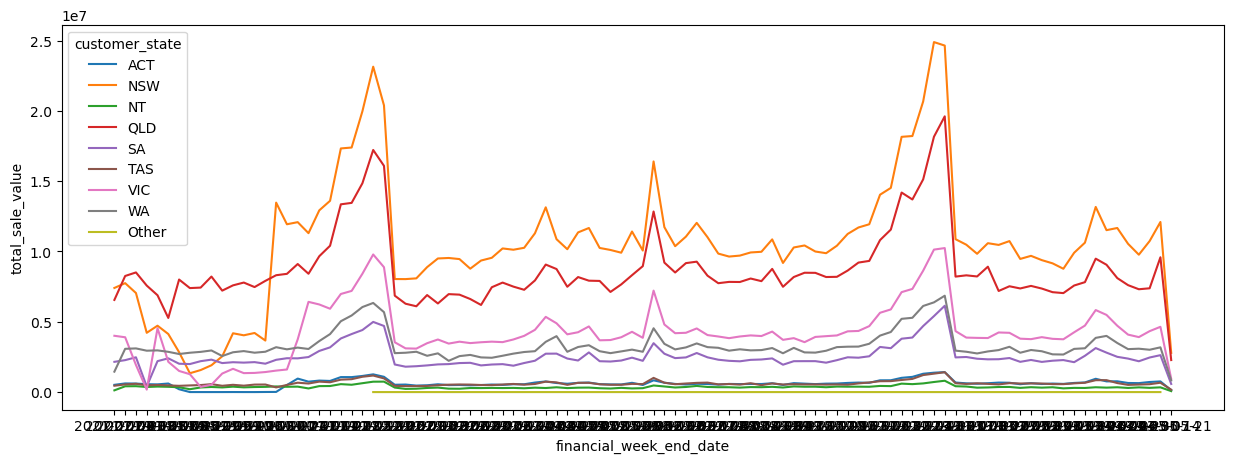

In [231]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=Weekly_sales2, x="financial_week_end_date", y="total_sale_value",hue="customer_state")

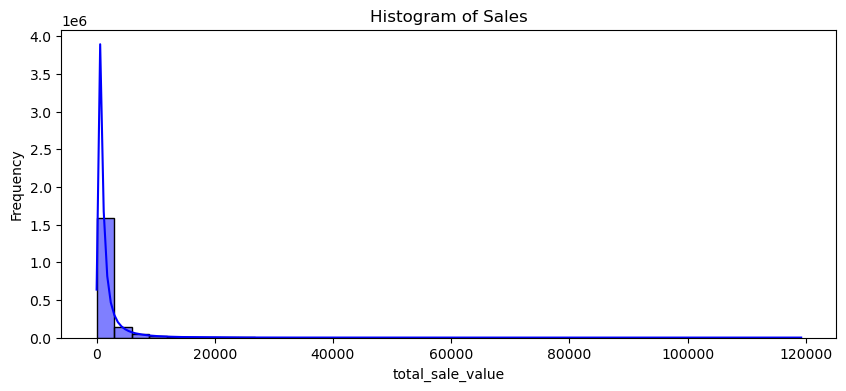

In [232]:
#Histogram of Sales
plt.figure(figsize=(10, 4))

sns.histplot(Customer_train['total_sale_value'], bins=40, kde=True, color='blue')
plt.xlabel('total_sale_value')
plt.ylabel('Frequency')
plt.title('Histogram of Sales')

plt.show()

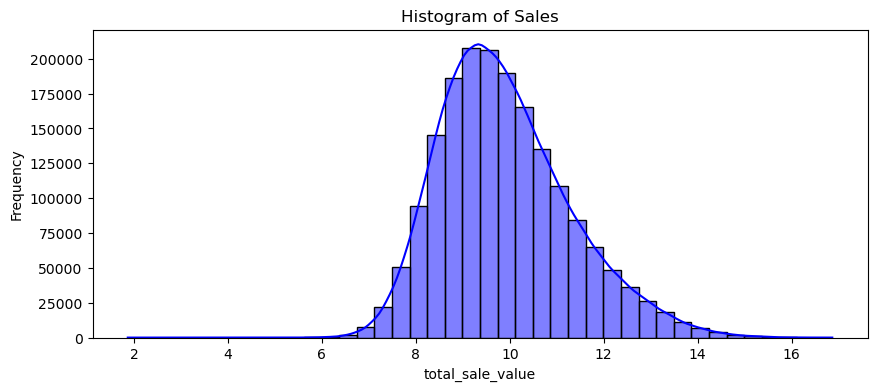

In [233]:
#Histogram of Sales
plt.figure(figsize=(10, 4))
log_sale_value = np.log2(Customer_train['total_sale_value'])
sns.histplot(log_sale_value, bins=40, kde=True, color='blue')
plt.xlabel('total_sale_value')
plt.ylabel('Frequency')
plt.title('Histogram of Sales')

plt.show()

In [234]:
print(log_sale_value.skew()) #Calculate Skewness for SalePrice

0.6082743294533518


In [235]:

Customer_train['financial_week_end_date'] = pd.to_datetime(Customer_train['financial_week_end_date'], format='%Y-%m-%d')
Customer_train['month'] = Customer_train['financial_week_end_date'].dt.strftime('%m/%y')
lifestage = Customer_train.groupby(['price_lifestage_segment'],as_index=False)['total_sale_value'].sum()
lifestage

,price_lifestage_segment,total_sale_value
0,Budget-Midage Singles/Couples,7.323329e+07
1,Budget-New Families,1.920942e+08
2,Budget-Older Families,1.615021e+08
3,Budget-Older Singles/Couples,2.169298e+08
4,Budget-Retirees,1.035405e+08
5,Budget-Young Families,4.944787e+08
6,Budget-Young Singles/Couples,1.321310e+08
7,Mainstream-Midage Singles/Couples,7.467380e+07
8,Mainstream-New Families,1.183941e+08
9,Mainstream-Older Families,1.104435e+08


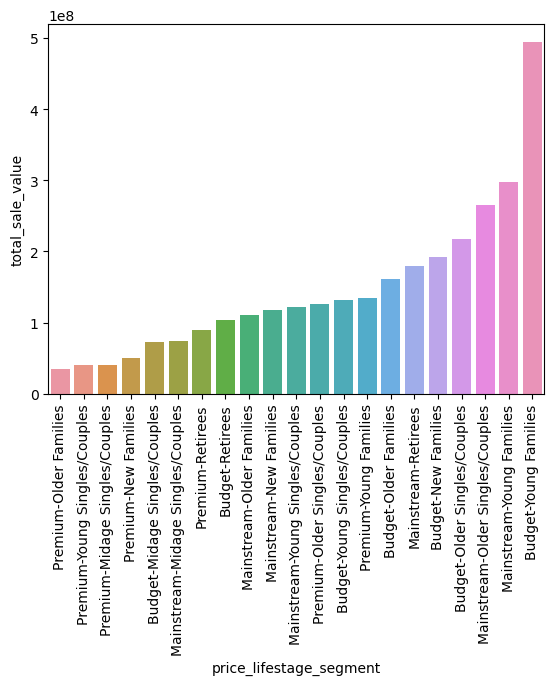

In [236]:
lifestage = lifestage.sort_values('total_sale_value')
sns.barplot(x='price_lifestage_segment',y='total_sale_value',data = lifestage)
plt.xticks(rotation=90);

# Data processing for Model Evaluation

In [237]:
Customer_train.head()

,store_id,sales_channel,customer_state,customer_postcode,price_lifestage_segment,customer_count,transaction_count,total_sale_value,total_sale_value_ex_gst,total_promotional_sales_value,financial_week_end_date,month
0,536fcc1021bff60edb212ca9b2480757,Store,NSW,2550.0,Budget-New Families,51,77,6691.29,6146.98,1545.78,2023-03-26,03/23
1,151e50feaf21b61cf23e0b944abebe28,Store,VIC,3222.0,Budget-Retirees,8,8,364.53,331.40,89.72,2022-01-02,01/22
2,b94d71e6bc4cc21ffbaaef5e4aca6f03,Store,QLD,4101.0,Mainstream-Young Singles/Couples,10,11,446.25,405.69,9.75,2023-03-19,03/23
3,336e7e53cf0e3fbc9eb41bfaf6dc4847,Store,SA,5253.0,Mainstream-Young Families,79,119,7479.89,6817.90,1365.50,2023-01-29,01/23
4,97012ce84c33e28732cb5f12bb92363c,Store,VIC,3064.0,Premium-New Families,58,84,6172.44,5630.27,508.59,2021-11-07,11/21


In [238]:
location

,store_id,store_state,store_postcode,store_latitude,store_longitude,co_location_flag,sales_channel,distance_to_kmart,distance_to_target,total_sale_value,total_sale_value_ex_gst,total_promotional_sales_value
1,dad2fd502d209b12ac27f451b0b9c17e,NSW,2325,-32.8357,151.3535,False,Store,>5 KM,<1 KM,45805299.60,41876270.68,5820887.92
2,dad2fd502d209b12ac27f451b0b9c17e,NSW,2325,-32.8357,151.3535,False,Digital - ClickCollect,>5 KM,<1 KM,3950499.23,3593377.70,36306.13
3,b03a75fccca587a511170aa5b7952210,NSW,2430,-31.9101,152.4583,True,Store,>5 KM,<1 KM,53824089.33,49136867.08,7816228.29
4,b03a75fccca587a511170aa5b7952210,NSW,2430,-31.9101,152.4583,True,Digital - ClickCollect,>5 KM,<1 KM,3910046.42,3556971.06,36379.29
5,a9bd0eeb3ce6858df275497bb2089ec4,NSW,2478,-28.8591,153.5644,False,Store,<1 KM,<1 KM,45348355.65,41363756.45,6134004.10
...,...,...,...,...,...,...,...,...,...,...,...,...
420,42d470aa848c771c6522022a5e974f97,WA,6027,-31.7438,115.7665,True,Store,Same Centre,Same Centre,63887129.46,58302662.97,8946705.85
421,06dc9c10cb8eb46b5fcca86460df8662,WA,6056,-31.8903,116.0015,True,Digital - ClickCollect,Same Centre,Same Centre,3475983.65,3161995.57,27192.66
422,06dc9c10cb8eb46b5fcca86460df8662,WA,6056,-31.8903,116.0015,True,Store,Same Centre,Same Centre,69622766.17,63498115.67,9680061.90
423,9732aa7d24a1bc42b7bd1c2a4ca45732,WA,6210,-32.5351,115.7418,True,Digital - ClickCollect,Same Centre,Same Centre,2433211.16,2213407.30,17508.98


In [239]:
location2=location[['store_id','distance_to_kmart','distance_to_target','co_location_flag']]
location2

,store_id,distance_to_kmart,distance_to_target,co_location_flag
1,dad2fd502d209b12ac27f451b0b9c17e,>5 KM,<1 KM,False
2,dad2fd502d209b12ac27f451b0b9c17e,>5 KM,<1 KM,False
3,b03a75fccca587a511170aa5b7952210,>5 KM,<1 KM,True
4,b03a75fccca587a511170aa5b7952210,>5 KM,<1 KM,True
5,a9bd0eeb3ce6858df275497bb2089ec4,<1 KM,<1 KM,False
...,...,...,...,...
420,42d470aa848c771c6522022a5e974f97,Same Centre,Same Centre,True
421,06dc9c10cb8eb46b5fcca86460df8662,Same Centre,Same Centre,True
422,06dc9c10cb8eb46b5fcca86460df8662,Same Centre,Same Centre,True
423,9732aa7d24a1bc42b7bd1c2a4ca45732,Same Centre,Same Centre,True


In [240]:
location2['distance_to_kmart'].unique()

array(['>5 KM', '<1 KM', '3-5 KM', 'Same Centre', '1-3 KM'], dtype=object)

In [241]:
# We classified into nearkmart/neartarget ('Same Centre','<1 KM','1-3KM') and farkmart/fartarget ('3-5KM','>5 KM')
location2 = location2.copy()

In [242]:
# Classify as 'nearkmart' vs 'neartarget'
location2.loc[location2['distance_to_kmart'].isin(['Same Centre', '<1 KM', '1-3 KM']), 'distance_to_kmart'] = 'nearkmart'
location2.loc[location2['distance_to_target'].isin(['Same Centre', '<1 KM', '1-3 KM']), 'distance_to_target'] = 'neartarget'
# Classify as 'farkmart' vs 'fartarget'
location2.loc[location2['distance_to_kmart'].isin(['3-5 KM', '>5 KM']), 'distance_to_kmart'] = 'farkmart'
location2.loc[location2['distance_to_target'].isin(['3-5 KM','>5 KM']), 'distance_to_target'] = 'fartarget'

In [243]:
location2

,store_id,distance_to_kmart,distance_to_target,co_location_flag
1,dad2fd502d209b12ac27f451b0b9c17e,farkmart,neartarget,False
2,dad2fd502d209b12ac27f451b0b9c17e,farkmart,neartarget,False
3,b03a75fccca587a511170aa5b7952210,farkmart,neartarget,True
4,b03a75fccca587a511170aa5b7952210,farkmart,neartarget,True
5,a9bd0eeb3ce6858df275497bb2089ec4,nearkmart,neartarget,False
...,...,...,...,...
420,42d470aa848c771c6522022a5e974f97,nearkmart,neartarget,True
421,06dc9c10cb8eb46b5fcca86460df8662,nearkmart,neartarget,True
422,06dc9c10cb8eb46b5fcca86460df8662,nearkmart,neartarget,True
423,9732aa7d24a1bc42b7bd1c2a4ca45732,nearkmart,neartarget,True


In [244]:
location2['distance_to_kmart'].unique()

array(['farkmart', 'nearkmart'], dtype=object)

In [245]:
# Convert 'nearkmart' to 0 and 'farkmart' to 1 in the 'distance_to_kmart' column
location2['distance_to_kmart'] = location2['distance_to_kmart'].replace({'nearkmart': 0, 'farkmart': 1})

location2['distance_to_target'] = location2['distance_to_target'].replace({'neartarget': 0, 'fartarget': 1})

location2['co_location_flag'] = location2['co_location_flag'].astype(int)

In [246]:
location2

,store_id,distance_to_kmart,distance_to_target,co_location_flag
1,dad2fd502d209b12ac27f451b0b9c17e,1,0,0
2,dad2fd502d209b12ac27f451b0b9c17e,1,0,0
3,b03a75fccca587a511170aa5b7952210,1,0,1
4,b03a75fccca587a511170aa5b7952210,1,0,1
5,a9bd0eeb3ce6858df275497bb2089ec4,0,0,0
...,...,...,...,...
420,42d470aa848c771c6522022a5e974f97,0,0,1
421,06dc9c10cb8eb46b5fcca86460df8662,0,0,1
422,06dc9c10cb8eb46b5fcca86460df8662,0,0,1
423,9732aa7d24a1bc42b7bd1c2a4ca45732,0,0,1


In [247]:
#We add new feature on average transaction per customer
Customer_train['average_transaction'] = Customer_train['transaction_count']/Customer_train['customer_count']
Customer_train

,store_id,sales_channel,customer_state,customer_postcode,price_lifestage_segment,customer_count,transaction_count,total_sale_value,total_sale_value_ex_gst,total_promotional_sales_value,financial_week_end_date,month,average_transaction
0,536fcc1021bff60edb212ca9b2480757,Store,NSW,2550.0,Budget-New Families,51,77,6691.29,6146.98,1545.78,2023-03-26,03/23,1.509804
1,151e50feaf21b61cf23e0b944abebe28,Store,VIC,3222.0,Budget-Retirees,8,8,364.53,331.40,89.72,2022-01-02,01/22,1.000000
2,b94d71e6bc4cc21ffbaaef5e4aca6f03,Store,QLD,4101.0,Mainstream-Young Singles/Couples,10,11,446.25,405.69,9.75,2023-03-19,03/23,1.100000
3,336e7e53cf0e3fbc9eb41bfaf6dc4847,Store,SA,5253.0,Mainstream-Young Families,79,119,7479.89,6817.90,1365.50,2023-01-29,01/23,1.506329
4,97012ce84c33e28732cb5f12bb92363c,Store,VIC,3064.0,Premium-New Families,58,84,6172.44,5630.27,508.59,2021-11-07,11/21,1.448276
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1827587,17b4adf18100c8673e3f2c72dff87722,Store,QLD,4220.0,Mainstream-Midage Singles/Couples,8,9,710.79,646.18,319.40,2021-07-18,07/21,1.125000
1827588,b16365302aa017bfadf5b34a84a84e45,Store,WA,6066.0,Mainstream-Retirees,42,46,2064.05,1886.07,268.02,2022-12-18,12/22,1.095238
1827589,d0f1c52a0107bd8707444bbf130a0234,Store,WA,6170.0,Mainstream-Midage Singles/Couples,29,37,1795.17,1634.68,170.20,2022-02-13,02/22,1.275862
1827590,408b7c8ad06e4d9954fa2d948a01f508,Store,NSW,2769.0,Mainstream-Older Singles/Couples,32,38,2141.80,1973.61,204.08,2022-12-18,12/22,1.187500


In [248]:
Customer_train1 = Customer_train[['store_id','customer_state','total_sale_value','financial_week_end_date','price_lifestage_segment','average_transaction']]
Customer_train1

,store_id,customer_state,total_sale_value,financial_week_end_date,price_lifestage_segment,average_transaction
0,536fcc1021bff60edb212ca9b2480757,NSW,6691.29,2023-03-26,Budget-New Families,1.509804
1,151e50feaf21b61cf23e0b944abebe28,VIC,364.53,2022-01-02,Budget-Retirees,1.000000
2,b94d71e6bc4cc21ffbaaef5e4aca6f03,QLD,446.25,2023-03-19,Mainstream-Young Singles/Couples,1.100000
3,336e7e53cf0e3fbc9eb41bfaf6dc4847,SA,7479.89,2023-01-29,Mainstream-Young Families,1.506329
4,97012ce84c33e28732cb5f12bb92363c,VIC,6172.44,2021-11-07,Premium-New Families,1.448276
...,...,...,...,...,...,...
1827587,17b4adf18100c8673e3f2c72dff87722,QLD,710.79,2021-07-18,Mainstream-Midage Singles/Couples,1.125000
1827588,b16365302aa017bfadf5b34a84a84e45,WA,2064.05,2022-12-18,Mainstream-Retirees,1.095238
1827589,d0f1c52a0107bd8707444bbf130a0234,WA,1795.17,2022-02-13,Mainstream-Midage Singles/Couples,1.275862
1827590,408b7c8ad06e4d9954fa2d948a01f508,NSW,2141.80,2022-12-18,Mainstream-Older Singles/Couples,1.187500


In [249]:
Final_data = Customer_train1.merge(location2, on='store_id', how='inner')
Final_data

,store_id,customer_state,total_sale_value,financial_week_end_date,price_lifestage_segment,average_transaction,distance_to_kmart,distance_to_target,co_location_flag
0,536fcc1021bff60edb212ca9b2480757,NSW,6691.29,2023-03-26,Budget-New Families,1.509804,1,1,1
1,536fcc1021bff60edb212ca9b2480757,NSW,6691.29,2023-03-26,Budget-New Families,1.509804,1,1,1
2,536fcc1021bff60edb212ca9b2480757,NSW,1668.34,2021-07-04,Budget-Midage Singles/Couples,1.333333,1,1,1
3,536fcc1021bff60edb212ca9b2480757,NSW,1668.34,2021-07-04,Budget-Midage Singles/Couples,1.333333,1,1,1
4,536fcc1021bff60edb212ca9b2480757,NSW,4184.67,2022-07-17,Budget-Retirees,1.320988,1,1,1
...,...,...,...,...,...,...,...,...,...
4463277,19b92d61d4e2b91dc2f30a7f87bc81eb,VIC,210.80,2022-05-15,Budget-Retirees,1.000000,0,0,0
4463278,19b92d61d4e2b91dc2f30a7f87bc81eb,VIC,2253.94,2022-10-30,Budget-Older Singles/Couples,1.214286,0,0,0
4463279,19b92d61d4e2b91dc2f30a7f87bc81eb,VIC,2253.94,2022-10-30,Budget-Older Singles/Couples,1.214286,0,0,0
4463280,19b92d61d4e2b91dc2f30a7f87bc81eb,VIC,565.20,2022-07-10,Premium-Older Singles/Couples,1.000000,0,0,0


In [250]:
Final_data = Final_data.drop_duplicates()
Final_data

,store_id,customer_state,total_sale_value,financial_week_end_date,price_lifestage_segment,average_transaction,distance_to_kmart,distance_to_target,co_location_flag
0,536fcc1021bff60edb212ca9b2480757,NSW,6691.29,2023-03-26,Budget-New Families,1.509804,1,1,1
2,536fcc1021bff60edb212ca9b2480757,NSW,1668.34,2021-07-04,Budget-Midage Singles/Couples,1.333333,1,1,1
4,536fcc1021bff60edb212ca9b2480757,NSW,4184.67,2022-07-17,Budget-Retirees,1.320988,1,1,1
6,536fcc1021bff60edb212ca9b2480757,NSW,1195.47,2022-06-19,Premium-New Families,1.200000,1,1,1
8,536fcc1021bff60edb212ca9b2480757,NSW,953.58,2023-04-09,Mainstream-New Families,1.250000,1,1,1
...,...,...,...,...,...,...,...,...,...
4463272,19b92d61d4e2b91dc2f30a7f87bc81eb,VIC,1107.40,2022-02-27,Premium-Retirees,1.153846,0,0,0
4463274,19b92d61d4e2b91dc2f30a7f87bc81eb,VIC,628.07,2022-12-04,Mainstream-Midage Singles/Couples,1.666667,0,0,0
4463276,19b92d61d4e2b91dc2f30a7f87bc81eb,VIC,210.80,2022-05-15,Budget-Retirees,1.000000,0,0,0
4463278,19b92d61d4e2b91dc2f30a7f87bc81eb,VIC,2253.94,2022-10-30,Budget-Older Singles/Couples,1.214286,0,0,0


In [251]:
#We merge media speding with the data set above:
Media['financial_week_end_date'] = pd.to_datetime(Media['financial_week_end_date'], format='%Y-%m-%d')
Final_data['financial_week_end_date'] = pd.to_datetime(Final_data['financial_week_end_date'], format='%Y-%m-%d')

Final_data = Final_data.merge(Media, on=['financial_week_end_date', 'customer_state'], how='inner')

C:\Users\Tran Dong Hy\AppData\Local\Temp\ipykernel_3080\3045816844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Final_data['financial_week_end_date'] = pd.to_datetime(Final_data['financial_week_end_date'], format='%Y-%m-%d')


In [252]:
Final_data = Final_data.sort_values(by='financial_week_end_date', ascending=True)
Final_data

,store_id,customer_state,total_sale_value,financial_week_end_date,price_lifestage_segment,average_transaction,distance_to_kmart,distance_to_target,co_location_flag,media_amount_spend
0,536fcc1021bff60edb212ca9b2480757,NSW,1668.34,2021-07-04,Budget-Midage Singles/Couples,1.333333,1,1,1,2.691535e+06
1313183,cf17919db51b07c8187d2f9531f1fb9e,VIC,1101.77,2021-07-04,Mainstream-Young Families,1.333333,0,0,1,1.737682e+06
1313184,cf17919db51b07c8187d2f9531f1fb9e,VIC,7507.94,2021-07-04,Budget-Young Singles/Couples,1.393617,0,0,1,1.737682e+06
1313185,cf17919db51b07c8187d2f9531f1fb9e,VIC,5630.88,2021-07-04,Mainstream-Young Families,1.468085,0,0,1,1.737682e+06
1313186,cf17919db51b07c8187d2f9531f1fb9e,VIC,1100.45,2021-07-04,Budget-Retirees,1.000000,0,0,1,1.737682e+06
...,...,...,...,...,...,...,...,...,...,...
70633,88f028cc6f1743e8f86dc9742ae6a845,NSW,175.05,2023-03-05,Budget-Young Singles/Couples,1.000000,1,1,1,1.040555e+05
70632,88f028cc6f1743e8f86dc9742ae6a845,NSW,300.34,2023-03-05,Budget-Older Families,1.000000,1,1,1,1.040555e+05
70631,88f028cc6f1743e8f86dc9742ae6a845,NSW,12882.23,2023-03-05,Budget-Young Families,1.261745,1,1,1,1.040555e+05
70629,88f028cc6f1743e8f86dc9742ae6a845,NSW,997.30,2023-03-05,Mainstream-Midage Singles/Couples,1.571429,1,1,1,1.040555e+05


In [253]:
Median_weekly_earning = pd.read_csv('Median weekly earnings in main job, by state and territory.csv',na_values=[])
Median_weekly_earning

,Full State,State,Average week earning
0,Australian Capital Territory,ACT,"1,518"
1,Northern Territory,NT,"1,400"
2,Western Australia,WA,"1,315"
3,New South Wales,NSW,"1,250"
4,Victoria,VIC,"1,250"
5,Queensland,QLD,"1,211"
6,South Australia,SA,"1,125"
7,Tasmania,TAS,"1,075"


In [254]:
Median_weekly_earning = Median_weekly_earning.rename(columns={"State": "customer_state"})
Median_weekly_earning

,Full State,customer_state,Average week earning
0,Australian Capital Territory,ACT,"1,518"
1,Northern Territory,NT,"1,400"
2,Western Australia,WA,"1,315"
3,New South Wales,NSW,"1,250"
4,Victoria,VIC,"1,250"
5,Queensland,QLD,"1,211"
6,South Australia,SA,"1,125"
7,Tasmania,TAS,"1,075"


In [255]:
#We conssider Averate week earning in our model
Median_weekly_earning = Median_weekly_earning.drop(columns=['Full State'])
Final_data = Final_data.merge(Median_weekly_earning, on='customer_state', how='inner')

In [256]:
# Create dummy variables for 'customer_state'
state_dummies = pd.get_dummies(Final_data['customer_state'], prefix='state')

# Create dummy variables for 'price_lifestage_segment'
price_lifestage_dummies = pd.get_dummies(Final_data['price_lifestage_segment'], prefix='price_lifestage')

# Concatenate the two dummy DataFrames to the original DataFrame (if desired)
Final_data = pd.concat([Final_data, state_dummies, price_lifestage_dummies], axis=1)

# Optionally, drop the original columns to avoid redundancy
Final_data.drop(['customer_state', 'price_lifestage_segment'], axis=1, inplace=True)


In [257]:
#Transform total sales value to log 2 data due to is normality
Final_data['log_total_sale_value'] = np.log2(Final_data['total_sale_value'])
Final_data
Final_data['Average week earning'] = Final_data['Average week earning'].str.replace(',', '').astype(float)

In [258]:
Final_data

,store_id,total_sale_value,financial_week_end_date,average_transaction,distance_to_kmart,distance_to_target,co_location_flag,media_amount_spend,Average week earning,state_ACT,...,price_lifestage_Mainstream-Young Families,price_lifestage_Mainstream-Young Singles/Couples,price_lifestage_Premium-Midage Singles/Couples,price_lifestage_Premium-New Families,price_lifestage_Premium-Older Families,price_lifestage_Premium-Older Singles/Couples,price_lifestage_Premium-Retirees,price_lifestage_Premium-Young Families,price_lifestage_Premium-Young Singles/Couples,log_total_sale_value
0,536fcc1021bff60edb212ca9b2480757,1668.34,2021-07-04,1.333333,1,1,1,2.691535e+06,1250.0,0,...,0,0,0,0,0,0,0,0,0,10.704198
1,54df5e38455d75e5c0e2c55f40f825fa,3312.74,2021-07-04,1.166667,1,0,1,2.691535e+06,1250.0,0,...,0,0,0,0,0,0,0,0,0,11.693809
2,dad2fd502d209b12ac27f451b0b9c17e,777.00,2021-07-04,1.187500,1,0,0,2.691535e+06,1250.0,0,...,0,0,0,0,0,0,0,0,0,9.601771
3,dad2fd502d209b12ac27f451b0b9c17e,9321.43,2021-07-04,1.336842,1,0,0,2.691535e+06,1250.0,0,...,1,0,0,0,0,0,0,0,0,13.186336
4,dad2fd502d209b12ac27f451b0b9c17e,798.70,2021-07-04,1.157895,1,0,0,2.691535e+06,1250.0,0,...,0,0,0,0,0,0,0,0,0,9.641510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592877,c22b7285b63e1d6f09a10dc258858d48,947.90,2023-03-05,1.500000,0,1,1,2.763118e+03,1518.0,1,...,0,0,0,0,0,0,0,0,0,9.888591
1592878,c22b7285b63e1d6f09a10dc258858d48,1479.06,2023-03-05,1.222222,0,1,1,2.763118e+03,1518.0,1,...,1,0,0,0,0,0,0,0,0,10.530465
1592879,c22b7285b63e1d6f09a10dc258858d48,1079.53,2023-03-05,1.705882,0,1,1,2.763118e+03,1518.0,1,...,0,0,0,0,0,0,1,0,0,10.076188
1592880,c22b7285b63e1d6f09a10dc258858d48,1139.65,2023-03-05,1.111111,0,1,1,2.763118e+03,1518.0,1,...,0,0,0,0,0,0,0,0,1,10.154375


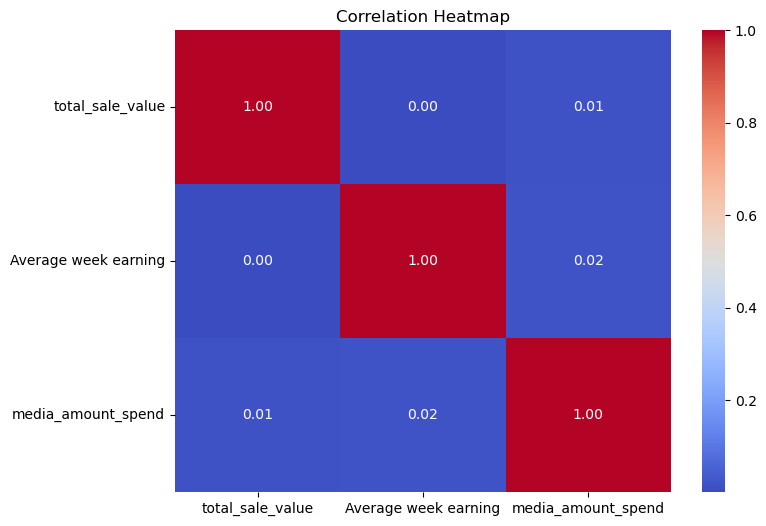

In [259]:
#Correlation Analysis
# Select the specific columns of interest
subset_data = Final_data[['total_sale_value', 'Average week earning', 'media_amount_spend']]

# Calculate the correlation matrix
correlation_matrix = subset_data.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [260]:
Final_data.head()

,store_id,total_sale_value,financial_week_end_date,average_transaction,distance_to_kmart,distance_to_target,co_location_flag,media_amount_spend,Average week earning,state_ACT,...,price_lifestage_Mainstream-Young Families,price_lifestage_Mainstream-Young Singles/Couples,price_lifestage_Premium-Midage Singles/Couples,price_lifestage_Premium-New Families,price_lifestage_Premium-Older Families,price_lifestage_Premium-Older Singles/Couples,price_lifestage_Premium-Retirees,price_lifestage_Premium-Young Families,price_lifestage_Premium-Young Singles/Couples,log_total_sale_value
0,536fcc1021bff60edb212ca9b2480757,1668.34,2021-07-04,1.333333,1,1,1,2691534.64,1250.0,0,...,0,0,0,0,0,0,0,0,0,10.704198
1,54df5e38455d75e5c0e2c55f40f825fa,3312.74,2021-07-04,1.166667,1,0,1,2691534.64,1250.0,0,...,0,0,0,0,0,0,0,0,0,11.693809
2,dad2fd502d209b12ac27f451b0b9c17e,777.00,2021-07-04,1.187500,1,0,0,2691534.64,1250.0,0,...,0,0,0,0,0,0,0,0,0,9.601771
3,dad2fd502d209b12ac27f451b0b9c17e,9321.43,2021-07-04,1.336842,1,0,0,2691534.64,1250.0,0,...,1,0,0,0,0,0,0,0,0,13.186336
4,dad2fd502d209b12ac27f451b0b9c17e,798.70,2021-07-04,1.157895,1,0,0,2691534.64,1250.0,0,...,0,0,0,0,0,0,0,0,0,9.641510


# Model Building

In [261]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X_Q1 = Final_data[['average_transaction','Average week earning','media_amount_spend','distance_to_kmart','distance_to_target','co_location_flag','state_ACT',	'state_NSW',	'state_NT',	'state_QLD',	'state_SA',	'state_TAS',	'state_VIC',	'state_WA','price_lifestage_Mainstream-Young Families','price_lifestage_Mainstream-Young Singles/Couples','price_lifestage_Premium-Midage Singles/Couples','price_lifestage_Premium-New Families','price_lifestage_Premium-Older Families','price_lifestage_Premium-Older Singles/Couples','price_lifestage_Premium-Retirees','price_lifestage_Premium-Young Families','price_lifestage_Premium-Young Singles/Couples']]
Y_Q1 = Final_data['log_total_sale_value']

from sklearn.model_selection import train_test_split
# split the dataset into train and test set, test size = 25%
x_train, x_test, y_train, y_test = train_test_split(X_Q1, Y_Q1, test_size=0.25, random_state=0)

# Linear Regression Model

In [262]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(x_train, y_train)

# Predict on new data
y_pred = lin_reg.predict(x_test)

In [263]:
# Get the coefficients and feature names
coefficients = lin_reg.coef_
feature_names = x_train.columns

# Create a DataFrame to store coefficients and feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Display the coefficients table
print(coefficients_df)

                                             Feature   Coefficient
0                                average_transaction  1.925840e+00
1                               Average week earning  3.010370e-04
2                                 media_amount_spend  5.997278e-09
3                                  distance_to_kmart  1.794895e-01
4                                 distance_to_target  2.307428e-02
5                                   co_location_flag -2.370813e-01
6                                          state_ACT -2.068583e-01
7                                          state_NSW  1.838382e-01
8                                           state_NT  1.311908e-01
9                                          state_QLD  1.463560e-01
10                                          state_SA -1.488975e-01
11                                         state_TAS -1.059381e-01
12                                         state_VIC -6.609457e-02
13                                          state_WA  6.640350

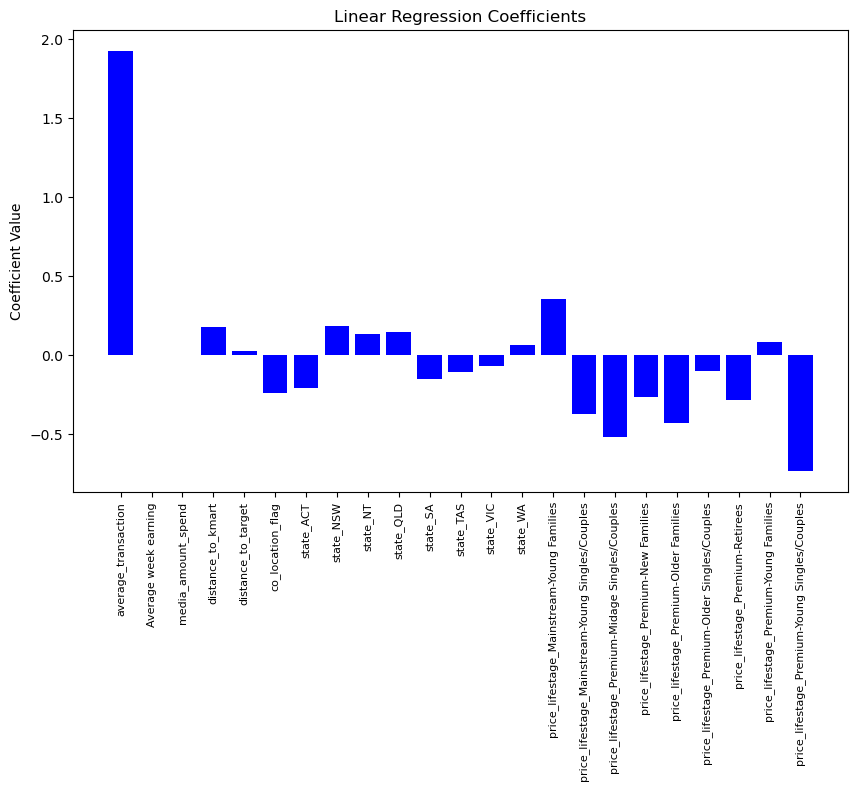

In [264]:
# Convert the coefficients to a list
data_lin_coef2 = lin_reg.coef_

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(x_train.columns, data_lin_coef2, color="blue")
plt.xticks(rotation=90, fontsize=8)
plt.title("Linear Regression Coefficients")
plt.ylabel("Coefficient Value")
plt.show()

In [265]:
# Add a constant term to the X matrix (intercept)
x_train_with_const = sm.add_constant(x_train)

# Fit a linear regression model using statsmodels
ols_model = sm.OLS(y_train, x_train_with_const)

# Fit the model
result = ols_model.fit()

# Get p-values for each coefficient
p_values = result.pvalues

# Create a DataFrame to store variable names and p-values
p_values_df = pd.DataFrame({'Variable': x_train_with_const.columns, 'P-value': p_values})

# Display the p-values table
print(p_values_df)

                                                                                          Variable  \
const                                                                                        const   
average_transaction                                                            average_transaction   
Average week earning                                                          Average week earning   
media_amount_spend                                                              media_amount_spend   
distance_to_kmart                                                                distance_to_kmart   
distance_to_target                                                              distance_to_target   
co_location_flag                                                                  co_location_flag   
state_ACT                                                                                state_ACT   
state_NSW                                                                         

In [266]:
# Compute the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE from MSE
r2 = r2_score(y_test, y_pred)

# Create a DataFrame to display the metrics
metrics_data = {
    "Mean Absolute Error (MAE)": [mae],
    "Mean Squared Error (MSE)": [mse],
    "Root Mean Squared Error (RMSE)": [rmse],  # Add RMSE to the dictionary
    "R-squared": [r2]
}

import pandas as pd

df_metrics = pd.DataFrame(metrics_data)

print(df_metrics.to_string(index=False))

 Mean Absolute Error (MAE)  Mean Squared Error (MSE)  Root Mean Squared Error (RMSE)  R-squared
                   1.04423                   1.72869                        1.314797   0.125698


# Decision Tree Model

In [267]:
from sklearn.tree import DecisionTreeRegressor
# Create a Decision Tree Regression model

decision_tree = DecisionTreeRegressor(random_state=0)

# Train the model
decision_tree.fit(x_train, y_train)

# Predict on new data
y_pred = decision_tree.predict(x_test)


In [268]:
# Get feature importances
feature_importances = decision_tree.feature_importances_

# Get the names of the features
feature_names = x_train.columns

# Create a DataFrame to store feature importances and their corresponding names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance (from most to least important)
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df)


                                             Feature  Importance
0                                average_transaction    0.776288
2                                 media_amount_spend    0.125031
4                                 distance_to_target    0.014614
1                               Average week earning    0.012018
3                                  distance_to_kmart    0.009556
14         price_lifestage_Mainstream-Young Families    0.006677
22     price_lifestage_Premium-Young Singles/Couples    0.006589
5                                   co_location_flag    0.005901
19     price_lifestage_Premium-Older Singles/Couples    0.005124
15  price_lifestage_Mainstream-Young Singles/Couples    0.004976
21            price_lifestage_Premium-Young Families    0.004917
12                                         state_VIC    0.004719
7                                          state_NSW    0.004205
20                  price_lifestage_Premium-Retirees    0.003366
9                        

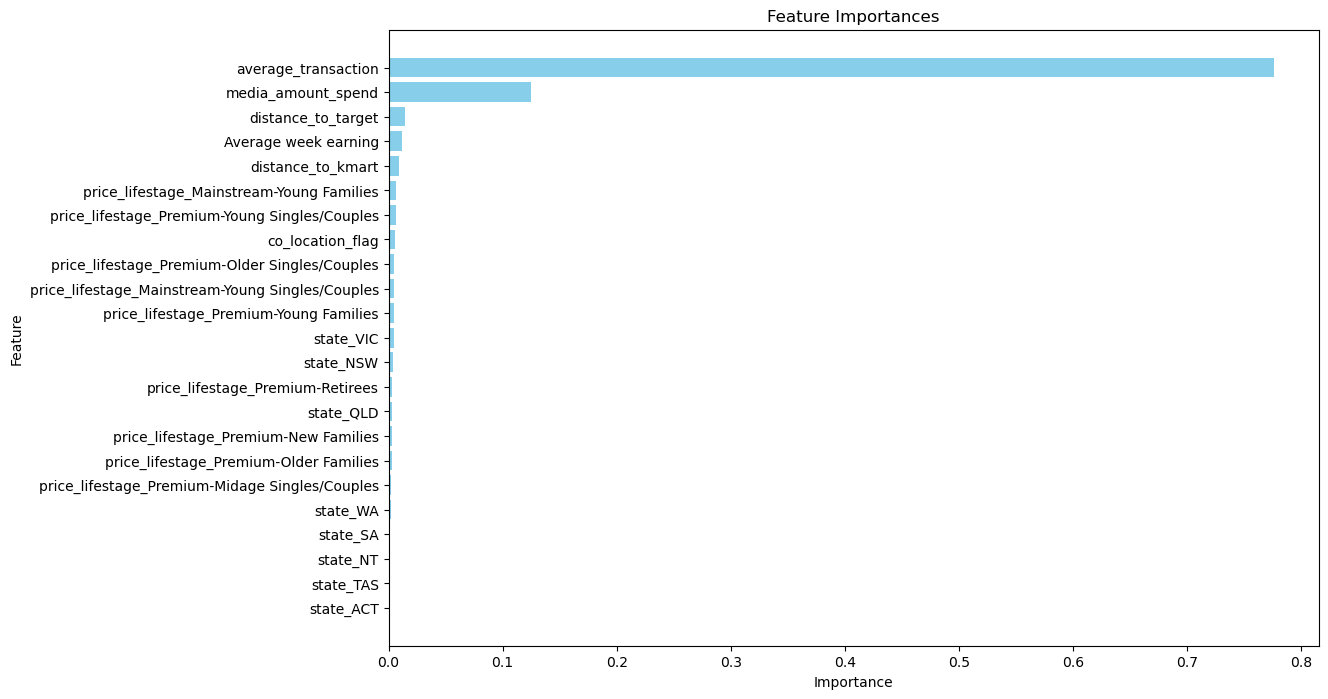

In [269]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a bar chart of feature importances
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')

# Invert the y-axis to have the most important feature at the top
plt.gca().invert_yaxis()

# Set the title and labels
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Display the bar chart
plt.show()

In [270]:
# Compute the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE from MSE
r2 = r2_score(y_test, y_pred)

# Create a DataFrame to display the metrics
metrics_data = {
    "Mean Absolute Error (MAE)": [mae],
    "Mean Squared Error (MSE)": [mse],
    "Root Mean Squared Error (RMSE)": [rmse],  # Add RMSE to the dictionary
    "R-squared": [r2]
}

import pandas as pd

df_metrics = pd.DataFrame(metrics_data)

print(df_metrics.to_string(index=False))

 Mean Absolute Error (MAE)  Mean Squared Error (MSE)  Root Mean Squared Error (RMSE)  R-squared
                  0.765907                  1.002884                        1.001441   0.492781


# Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Create a random forest regressor
param_grid = {
    'n_estimators': np.arange(3,50,5), 
    'max_depth': np.arange(5,20,5), 
}

rnd = RandomForestRegressor()
grid_search = GridSearchCV(rnd, param_grid, cv=3,n_jobs = -1, scoring='neg_mean_squared_error')

grid_search.fit(x_train,np.log(y_train))

print("best parameters:", grid_search.best_params_)
print("best neg_mean_squared_error:", -1*grid_search.best_score_)

best_rnd_model = grid_search.best_estimator_

# Predict on new data
y_pred_rnd = np.exp(best_rnd_model.predict(x_test))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rnd))
r2 = r2_score(y_test, y_pred_rnd)
metrics_data_rnd = {
    "Root Mean Squared Error (RMSE)": [rmse],
    "R-squared": [r2]
}
metrics_data_rnd 
--> n_estimator = 38, max_dept = 15

In [271]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regressor
rnd = RandomForestRegressor(n_estimators=38, max_depth=15 , n_jobs=-1)

# Train the regressor
rnd.fit(x_train, y_train)

# Predict on new data
y_pred = rnd.predict(x_test)

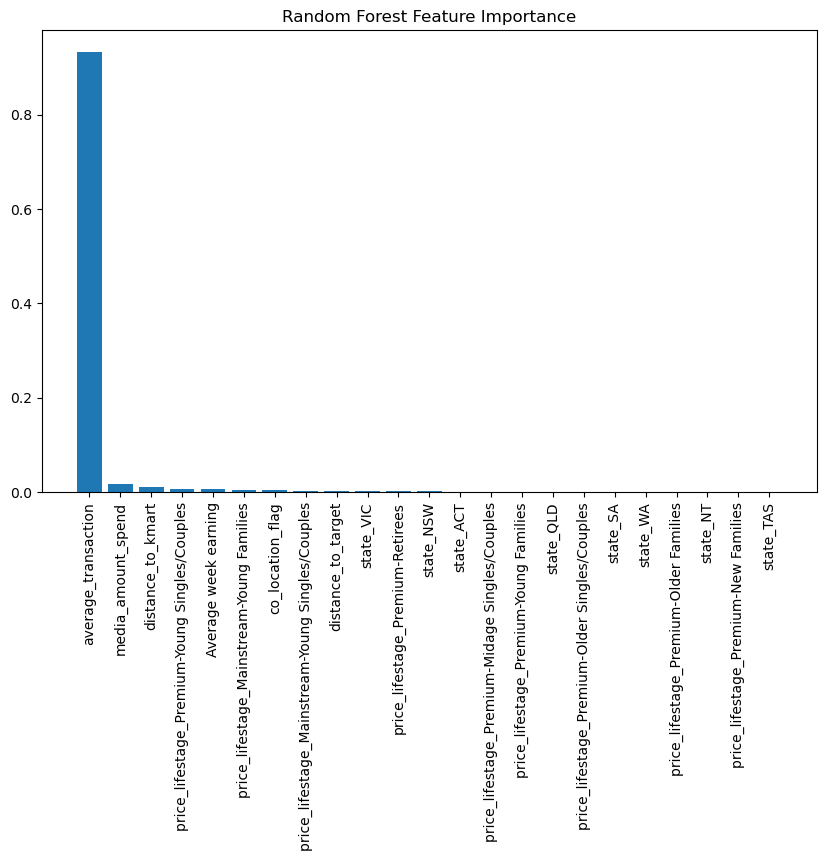

In [272]:
importances = rnd.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [x_train.columns[i] for i in indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.title("Random Forest Feature Importance")
plt.bar(range(x_train.shape[1]), importances[indices])
plt.xticks(range(x_train.shape[1]), names, rotation=90)
plt.show()

In [273]:
# Compute the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE from MSE
r2 = r2_score(y_test, y_pred)

# Create a DataFrame to display the metrics
metrics_data = {
    "Mean Absolute Error (MAE)": [mae],
    "Mean Squared Error (MSE)": [mse],
    "Root Mean Squared Error (RMSE)": [rmse],  # Add RMSE to the dictionary
    "R-squared": [r2]
}

import pandas as pd

df_metrics = pd.DataFrame(metrics_data)

print(df_metrics.to_string(index=False))

 Mean Absolute Error (MAE)  Mean Squared Error (MSE)  Root Mean Squared Error (RMSE)  R-squared
                   0.70306                  0.826617                        0.909185    0.58193


# Gradient Boosting

In [274]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model with default parameters
gbr = GradientBoostingRegressor()
param_grid = {
    'n_estimators': np.arange(3,50,5), 
    'max_depth': np.arange(5,20,5), 
}

grid_search = GridSearchCV(gbr, param_grid, cv=5,n_jobs = -1, scoring='neg_mean_squared_error')

grid_search.fit(x_train,np.log(y_train))

print("best parameters:", grid_search.best_params_)
print("best neg_mean_squared_error:", -1*grid_search.best_score_)

best_gbr_model = grid_search.best_estimator_

# Predict on new data
y_pred_gbr = np.exp(best_gbr_model.predict(x_test))
rmse = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2 = r2_score(y_test, y_pred_gbr)
metrics_data_gbr = {
    "Root Mean Squared Error (RMSE)": [rmse],
    "R-squared": [r2]
}

metrics_data_gbr
--> n_estimator = 38, max_dept = 16

In [297]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model with default parameters
gbr = GradientBoostingRegressor(n_estimators=38, learning_rate=0.1, max_depth=16, random_state=0)

# Fit the model
gbr.fit(x_train, y_train)

y_pred = gbr.predict(x_test)

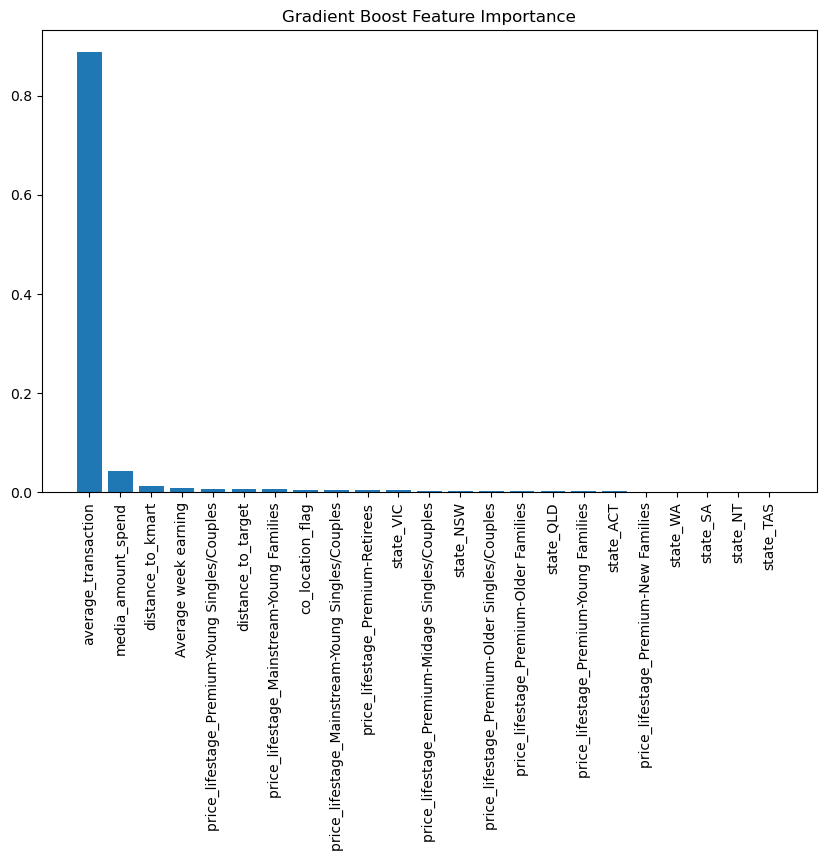

In [298]:
importances = gbr.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [x_train.columns[i] for i in indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.title("Gradient Boost Feature Importance")
plt.bar(range(x_train.shape[1]), importances[indices])
plt.xticks(range(x_train.shape[1]), names, rotation=90)
plt.show()

In [299]:
# Compute the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE from MSE
r2 = r2_score(y_test, y_pred)

# Create a DataFrame to display the metrics
metrics_data = {
    "Mean Absolute Error (MAE)": [mae],
    "Mean Squared Error (MSE)": [mse],
    "Root Mean Squared Error (RMSE)": [rmse],  # Add RMSE to the dictionary
    "R-squared": [r2]
}

import pandas as pd

df_metrics = pd.DataFrame(metrics_data)

print(df_metrics.to_string(index=False))

 Mean Absolute Error (MAE)  Mean Squared Error (MSE)  Root Mean Squared Error (RMSE)  R-squared
                  0.668149                  0.752074                        0.867222   0.619631


# Lasso Model

In [300]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Split the dataset into train and test sets, test size = 25%
x_train, x_test, y_train, y_test = train_test_split(X_Q1, Y_Q1, test_size=0.25, random_state=0)

# Create a Lasso regression model
lasso_reg = Lasso(alpha=0.7)  # You can adjust the alpha (regularization strength)

# Train the model
lasso_reg.fit(x_train, y_train)

# Predict on new data
y_pred = lasso_reg.predict(x_test)


# Compute the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE from MSE
r2 = r2_score(y_test, y_pred)

# Create a DataFrame to display the metrics
metrics_data = {
    "Mean Absolute Error (MAE)": [mae],
    "Mean Squared Error (MSE)": [mse],
    "Root Mean Squared Error (RMSE)": [rmse],  # Add RMSE to the dictionary
    "R-squared": [r2]
}

import pandas as pd

df_metrics = pd.DataFrame(metrics_data)

print(df_metrics.to_string(index=False))

 Mean Absolute Error (MAE)  Mean Squared Error (MSE)  Root Mean Squared Error (RMSE)  R-squared
                  1.115308                  1.976416                        1.405851   0.000408


In [301]:
# Get the coefficients (weights) of the model
coefficients = lasso_reg.coef_  

# associate them with feature names if you have them
feature_names = x_train.columns  # Corrected the variable name here (assuming x_train is a DataFrame)
coefficients_dict = dict(zip(feature_names, coefficients))

# Convert the coefficients dictionary to a DataFrame
df_coefficients = pd.DataFrame(coefficients_dict.items(), columns=['Feature', 'Coefficient'])

# Display the table
print(df_coefficients)

                                             Feature   Coefficient
0                                average_transaction  0.000000e+00
1                               Average week earning  5.049100e-06
2                                 media_amount_spend  2.798354e-08
3                                  distance_to_kmart  0.000000e+00
4                                 distance_to_target  0.000000e+00
5                                   co_location_flag -0.000000e+00
6                                          state_ACT -0.000000e+00
7                                          state_NSW  0.000000e+00
8                                           state_NT  0.000000e+00
9                                          state_QLD  0.000000e+00
10                                          state_SA -0.000000e+00
11                                         state_TAS -0.000000e+00
12                                         state_VIC -0.000000e+00
13                                          state_WA -0.000000

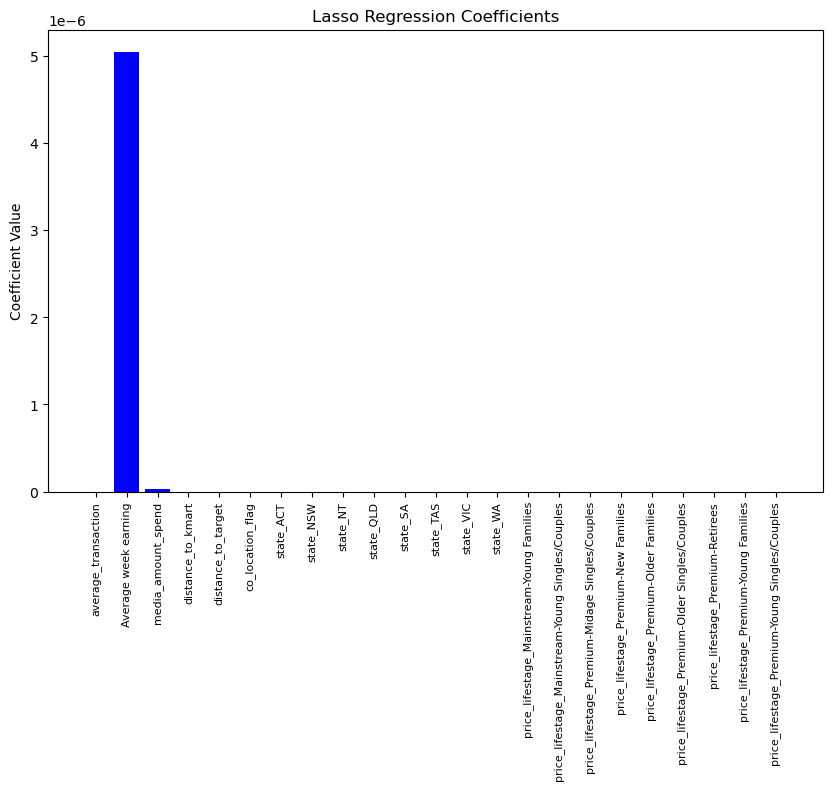

In [302]:
# Convert the coefficients to a list
data_lin_coef2 = lasso_reg.coef_

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(x_train.columns, lasso_reg.coef_, color="blue")
plt.xticks(rotation=90, fontsize=8)
plt.title("Lasso Regression Coefficients")
plt.ylabel("Coefficient Value")
plt.show()

# Time Forecasting ARIMA Model

In [281]:
!pip install pmdarima
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA


In [282]:
grouped_sales = Final_data.groupby('financial_week_end_date')['total_sale_value'].sum().reset_index()

In [283]:
grouped_sales

,financial_week_end_date,total_sale_value
0,2021-07-04,22275417.56
1,2021-07-11,26372051.55
2,2021-07-18,24339342.25
3,2021-07-25,16498697.39
4,2021-08-01,22322431.32
...,...,...
83,2023-02-05,29349862.60
84,2023-02-12,26685803.84
85,2023-02-19,27491028.74
86,2023-02-26,26795641.40


In [284]:
grouped_sales= grouped_sales.set_index(['financial_week_end_date'])
grouped_sales['log_total_sale_value'] = np.log2(grouped_sales['total_sale_value'])
grouped_sales

,total_sale_value,log_total_sale_value
financial_week_end_date,,
2021-07-04,22275417.56,24.408949
2021-07-11,26372051.55,24.652506
2021-07-18,24339342.25,24.536787
2021-07-25,16498697.39,23.975849
2021-08-01,22322431.32,24.411991
...,...,...
2023-02-05,29349862.60,24.806850
2023-02-12,26685803.84,24.669569
2023-02-19,27491028.74,24.712458


In [285]:
grouped_sales = grouped_sales.drop('total_sale_value',axis = 1)
grouped_sales

,log_total_sale_value
financial_week_end_date,
2021-07-04,24.408949
2021-07-11,24.652506
2021-07-18,24.536787
2021-07-25,23.975849
2021-08-01,24.411991
...,...
2023-02-05,24.806850
2023-02-12,24.669569
2023-02-19,24.712458


C:\Users\Tran Dong Hy\AppData\Local\Temp\ipykernel_3080\3276313503.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(grouped_sales["log_total_sale_value"], color = 'y')


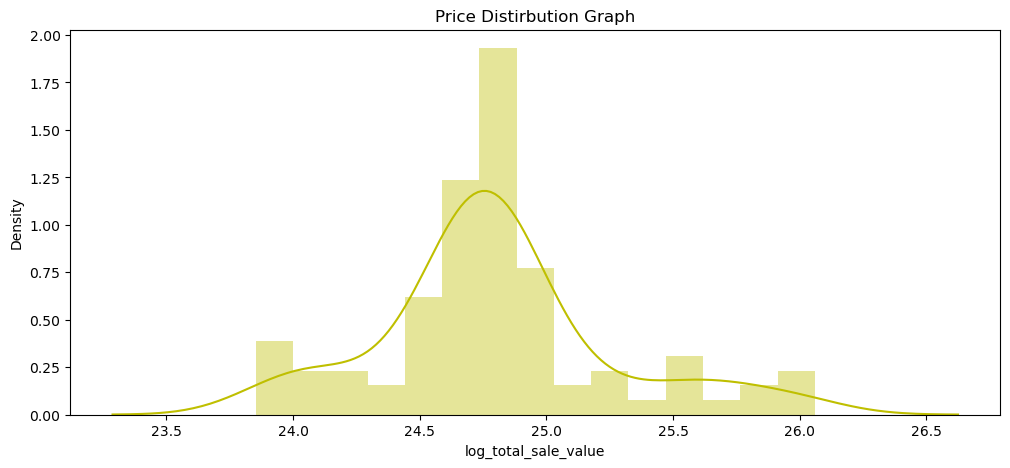

In [286]:

plt.figure(figsize=(12,5))
plt.title("Price Distirbution Graph")
ax = sns.distplot(grouped_sales["log_total_sale_value"], color = 'y')

In [287]:
def ad_test(dataset):

    dftest = adfuller(dataset, autolag = 'AIC')

    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:",dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
         print("\t",key, ": ", val)


ad_test(grouped_sales['log_total_sale_value'])

1. ADF :  -2.7862621354254715
2. P-Value :  0.06026307786047598
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 87
5. Critical Values :
	 1% :  -3.5078527246648834
	 5% :  -2.895382030636155
	 10% :  -2.584823877658872


Data not stationaey --> give "d" in Arima Model

In [288]:
stepwise_fit = auto_arima(grouped_sales['log_total_sale_value'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17.231, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18.962, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18.944, Time=0.39 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15.240, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.240 seconds


In [289]:
X = grouped_sales.values
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [290]:
for t in range(len(test)):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=24.764457, expected=24.744809
predicted=24.744809, expected=24.801642
predicted=24.801642, expected=24.888044
predicted=24.888044, expected=24.938606
predicted=24.938606, expected=24.982270
predicted=24.982270, expected=25.223820
predicted=25.223820, expected=25.279203
predicted=25.279203, expected=25.579908
predicted=25.579908, expected=25.581619
predicted=25.581619, expected=25.775809
predicted=25.775809, expected=26.002651
predicted=26.002651, expected=26.059427
predicted=26.059427, expected=24.843758
predicted=24.843758, expected=24.799923
predicted=24.799923, expected=24.747230
predicted=24.747230, expected=24.822184
predicted=24.822184, expected=24.758604
predicted=24.758604, expected=24.806850
predicted=24.806850, expected=24.669569
predicted=24.669569, expected=24.712458
predicted=24.712458, expected=24.675495
predicted=24.675495, expected=24.636380


C:\Users\Tran Dong Hy\anaconda3\New folder\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [291]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.284


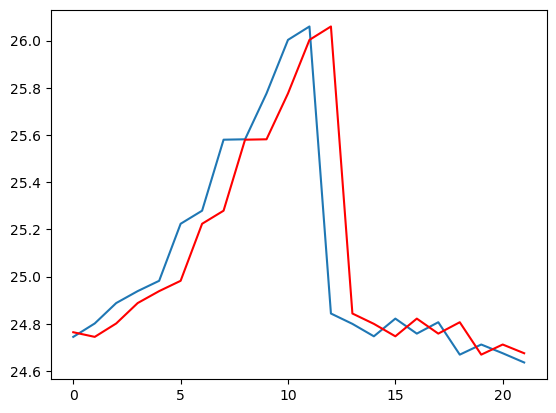

In [292]:
import matplotlib.pyplot as plt
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [303]:
# Calculate the residuals
residuals = [test[i] - predictions[i] for i in range(len(test))]

# Calculate SS_res
ss_res = sum([res**2 for res in residuals])

# Calculate SS_tot
mean_test = np.mean(test)
ss_tot = sum([(x - mean_test)**2 for x in test])

# Calculate R^2
r2 = 1 - (ss_res / ss_tot)

print("R-squared:", r2)


R-squared: [0.58243527]
